# Capstone Project - The Battle of Neighborhoods (Week 2): Notebook with Code

#### In this notebook, you will find the code I wrote to process and analyze my datasets to provide a recommendation to my client, Contractor X, on the ideal location to build an apartment building complex that meets the following requirements: 
1. A location with a low apartment building densities
2. A location with already existing nearby amenities for future tenants (e.g. grocery stores, fitness centres, shopping malls, parks, etc.)

#### The data I will be using is summarized below:
*  City Wards Data (https://open.toronto.ca/dataset/city-wards/): To find out the latitude and longitude of each of the 25 wards in Toronto). Data includes AREA_NAME, AREA_LONG_CODE, LONGITUDE, LATITUDE.
*  Apartment Building Registration Data (https://open.toronto.ca/dataset/apartment-building-registration/): To find out the density of registered apartment buildings for each ward in Toronto). Data includes PCODE, SITE_ADDRESS, WARD, YEAR_REGISTERED.
*  Foursquare Data: To find out which amenities (venue categories) are located in each ward. Data includes: WARD_NAME, WARD_CODE, LONGITUDE, LATITUDE, VENUE_LATITUDE, VENUE_LONGITUDE, VENUE_CATEGORY.

## Data Importing, Processing & Exploring

### Import the City Wards data from the City of Toronto open data calatogue

In [171]:
#Install the necessary libraries
import pandas as pd #library for data analsysis
import numpy as np #library to handle data in a vectorized manner
print('Libraries imported.')

Libraries imported.


In [2]:
# Read City Wards data
df = pd.read_csv("https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/7672dac5-b383-4d7c-90ec-291dc69d37bf?format=csv&projection=4326")
df.head()

,_id,AREA_ID,DATE_EFFECTIVE,DATE_EXPIRY,AREA_ATTR_ID,AREA_TYPE_ID,PARENT_AREA_ID,AREA_TYPE,AREA_CLASS_ID,AREA_CLASS,...,TRANS_ID_CREATE,TRANS_ID_EXPIRE,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
0,726,2457740,2018-08-07T18:11:06,3000-01-01T05:00:00,25993196,528,NaN,CITW,NaN,NaN,...,279754,-1,NaN,NaN,-79.530272,43.750724,17344785,5.886873e+07,43438.943048,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
1,727,2457739,2018-08-07T18:11:06,3000-01-01T05:00:00,25993195,528,NaN,CITW,NaN,NaN,...,279754,-1,NaN,NaN,-79.467810,43.752565,17344801,6.780539e+07,40910.174619,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
2,728,2457738,2018-08-07T18:11:06,3000-01-01T05:00:00,25993194,528,NaN,CITW,NaN,NaN,...,279754,-1,NaN,NaN,-79.416500,43.776886,17344817,3.792649e+07,24766.996984,"{u'type': u'Polygon', u'coordinates': (((-79.3..."
3,729,2457737,2018-08-07T18:11:06,3000-01-01T05:00:00,25993193,528,NaN,CITW,NaN,NaN,...,279754,-1,NaN,NaN,-79.394317,43.671139,17344833,2.600299e+07,29861.631464,"{u'type': u'Polygon', u'coordinates': (((-79.3..."
4,730,2457736,2018-08-07T18:11:06,3000-01-01T05:00:00,25993192,528,NaN,CITW,NaN,NaN,...,279754,-1,NaN,NaN,-79.306673,43.689268,17344849,3.215503e+07,30975.878034,"{u'type': u'Polygon', u'coordinates': (((-79.2..."


### Process the data into a workable dataframe for analysis

In [83]:
df_citywards = df[['AREA_LONG_CODE','AREA_NAME','LATITUDE','LONGITUDE']]
df_citywards = df_citywards.rename(columns={'AREA_LONG_CODE':'WARD','AREA_NAME':'WARD_NAME'})
df_citywards.sort_values(['WARD'], ascending = True, axis = 0, inplace = True)
df_citywards

,WARD,WARD_NAME,LATITUDE,LONGITUDE
14,1,Etobicoke North,43.719405,-79.584667
16,2,Etobicoke Centre,43.664431,-79.552534
15,3,Etobicoke-Lakeshore,43.621646,-79.520874
13,4,Parkdale-High Park,43.650121,-79.467340
22,5,York South-Weston,43.694951,-79.493371
1,6,York Centre,43.752565,-79.467810
0,7,Humber River-Black Creek,43.750724,-79.530272
17,8,Eglinton-Lawrence,43.718315,-79.433849
20,9,Davenport,43.669353,-79.444047
24,10,Spadina-Fort York,43.635801,-79.387335


### Import the Apartment Building Registration data from the City of Toronto open data calatogue

In [42]:
# Read Apartment Building Registration data
df2 = pd.read_csv("https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/3ad76a8c-0518-4df2-b94e-8c747d62f8c1?format=csv")
df2.head()

,_id,AIR_CONDITIONING_TYPE,AMENITIES_AVAILABLE,ANNUAL_FIRE_ALARM_TEST_RECORDS,ANNUAL_FIRE_PUMP_FLOW_TEST_RECORDS,APPROVED_FIRE_SAFETY_PLAN,BALCONIES,BARRIER_FREE_ACCESSIBILTY_ENTR,BIKE_PARKING,CONFIRMED_STOREYS,...,YEAR_OF_REPLACEMENT,YEAR_REGISTERED,NO_OF_STOREYS,IS_THERE_EMERGENCY_POWER?,NON-SMOKING_BUILDING,NO_OF_UNITS,NO_OF_ACCESSIBLEPARKING_SPACES,FACILITIES_AVAILABLE?,IS_THERE_A_COOLING_ROOM?,NO_BARRIERFREE_ACCESSBLE_UNITS
0,6905,NONE,NaN,NaN,NaN,NaN,NO,NO,Not Available,NaN,...,NaN,2017.0,4,NO,NO,13,0.0,Green Bin / Organics,NO,0.0
1,6906,NONE,NaN,NaN,NaN,NaN,NO,NO,Not Available,NaN,...,NaN,2017.0,3,NO,NO,12,0.0,Green Bin / Organics,NO,0.0
2,6907,NONE,NaN,NaN,NaN,NaN,NO,NO,Not Available,NaN,...,NaN,2019.0,3,NO,YES,11,0.0,Green Bin / Organics,NO,0.0
3,6908,INDIVIDUAL UNITS,NaN,NaN,NaN,NaN,YES,NO,Not Available,NaN,...,NaN,2018.0,3,NO,YES,12,0.0,Recycling bins,NO,NaN
4,6909,CENTRAL AIR,NaN,NaN,NaN,NaN,NO,YES,10 indoor parking spots and 10 outdoor parking...,NaN,...,NaN,2017.0,6,YES,NO,75,2.0,Green Bin / Organics,YES,0.0


In [43]:
#Get dimensions of dataset
df2.shape

(3454, 70)

### Process the data into a workable dataframe for analysis

In [84]:
aptcount = df2['WARD'].value_counts()
aptcount.index.name = 'WARD'
aptcount.sort_index(ascending = True, axis = 0, inplace = True)
aptcount.drop(labels =['YY'], inplace=True)
df_apartments = aptcount.to_frame('APT_BUILDINGS_COUNT')
df_apartments.index = pd.to_numeric(df_apartments.index)
df_apartments.reset_index()
df_apartments

,APT_BUILDINGS_COUNT
WARD,
1,81
2,130
3,240
4,197
5,233
6,236
7,102
8,242
9,89


### Merge the tables together for data exploration

In [85]:
df_citywards = pd.merge(df_citywards,right = df_apartments,on = 'WARD')
df_citywards

,WARD,WARD_NAME,LATITUDE,LONGITUDE,APT_BUILDINGS_COUNT
0,1,Etobicoke North,43.719405,-79.584667,81
1,2,Etobicoke Centre,43.664431,-79.552534,130
2,3,Etobicoke-Lakeshore,43.621646,-79.520874,240
3,4,Parkdale-High Park,43.650121,-79.467340,197
4,5,York South-Weston,43.694951,-79.493371,233
5,6,York Centre,43.752565,-79.467810,236
6,7,Humber River-Black Creek,43.750724,-79.530272,102
7,8,Eglinton-Lawrence,43.718315,-79.433849,242
8,9,Davenport,43.669353,-79.444047,89
9,10,Spadina-Fort York,43.635801,-79.387335,47


### Data exploration and visualization (Bar Chart)

In [49]:
#import matplotlib and its scripting interface
import matplotlib as mpl
import matplotlib.pyplot as plt
print('Libraries imported.')

Libraries imported.


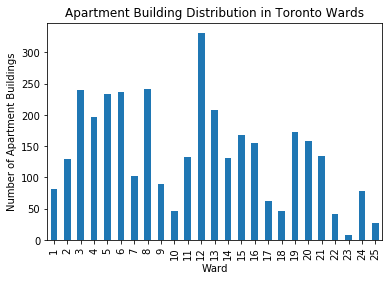

In [109]:
#Call the plot function on the cleaned data to visualize the Toronto ward apartment building distribution
df_citywards_plot = pd.merge(df_citywards,right = df_apartments,on = 'WARD')
df_citywards_plot.set_index('WARD', inplace=True, drop=True)
df_citywards_plot['APT_BUILDINGS_COUNT_x'].plot(kind = 'bar')
plt.title('Apartment Building Distribution in Toronto Wards')
plt.xlabel('Ward')
plt.ylabel('Number of Apartment Buildings')
plt.show()

### Further data visualization using folium maps

In [12]:
#Import the necessary libraries
import json 
from geopy.geocoders import Nominatim 
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes
import folium
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1e             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    ------------------------------------------------------------
                       

In [93]:
#Use geopy library to get the latitude and longitude values of Toronto
address = 'Toronto, ON, Canada'
geolocator = Nominatim(user_agent="to_explorer") 
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, ON, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, ON, Canada are 43.653963, -79.387207.


In [110]:
#Create a map of Toronto with wards superimposed on top with markers using folium
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, ward, ward_name in zip(df_citywards['LATITUDE'], df_citywards['LONGITUDE'], df_citywards['WARD'],df_citywards['WARD_NAME']):
    label = '{}, {}'.format(ward, ward_name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='pink',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Use the Foursquare API to explore the first ward in our dataframe and get the top venues in the area

In [95]:
#Define Foursquare Credentials and Version
CLIENT_ID = '11ZKE31BOHG5ODUROFYEGRV0EO0LC0AF5X2RS1YT5RAP515B'
CLIENT_SECRET = 'AZQUK1UAEUFVS1VEGBJM4ONYUTVSMTWYQ5P33CGMNMCB2VHM'
VERSION = '20180605' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 11ZKE31BOHG5ODUROFYEGRV0EO0LC0AF5X2RS1YT5RAP515B
CLIENT_SECRET:AZQUK1UAEUFVS1VEGBJM4ONYUTVSMTWYQ5P33CGMNMCB2VHM


In [112]:
ward = 1
ward_latitude = df_citywards_plot.loc[ward, "LATITUDE"] # ward latitude value
ward_longitude = df_citywards_plot.loc[ward, "LONGITUDE"] # ward longitude value
ward_name = df_citywards_plot.loc[ward, "WARD_NAME"] # ward name

print('Latitude and longitude values of {} (Ward {}) are {}, {}.'.format(ward_name,ward,ward_latitude, ward_longitude))

Latitude and longitude values of Etobicoke North (Ward 1) are 43.7194045513, -79.5846665077.


In [113]:
#Create the GET url
LIMIT = 10
radius = 1000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    ward_latitude, 
    ward_longitude, 
    radius, 
    LIMIT)

#Send the GET request
import requests
results = requests.get(url).json()

In [114]:
#Extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [115]:
#clean the json and structure it into a pandas dataframe.
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues

,name,categories,lat,lng
0,Fortinos,Grocery Store,43.721438,-79.596291
1,Mandarin Buffet,Chinese Restaurant,43.720360,-79.594387
2,Tim Hortons,Coffee Shop,43.714657,-79.593716
3,Xawaash,Mediterranean Restaurant,43.715786,-79.593053
4,Staples Rexdale,Paper / Office Supplies Store,43.718539,-79.594570
5,Winners,Department Store,43.719819,-79.594923
6,Tim Hortons,Coffee Shop,43.713177,-79.580186
7,Petro-Canada,Gas Station,43.714398,-79.581868
8,Subway,Sandwich Place,43.713119,-79.580191
9,Harvey's,Restaurant,43.712146,-79.577358


In [116]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

10 venues were returned by Foursquare.


### Create function to get venue data for all wards

In [117]:
def getNearbyVenues(wards,names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for ward,name, lat, lng in zip(wards,names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            ward,
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['WARD',
                  'WARD_NAME', 
                  'WARD LATITUDE', 
                  'WARD LONGITUDE', 
                  'VENUE', 
                  'VENUE LATITUDE', 
                  'VENUE LONGITUDE', 
                  'VENUE CATEGORY']
    
    return(nearby_venues)

In [118]:
#Run the above function on each ward and create a new dataframe
ward_venues = getNearbyVenues(wards=df_citywards['WARD'],
                                   names=df_citywards['WARD_NAME'],
                                   latitudes=df_citywards['LATITUDE'],
                                   longitudes=df_citywards['LONGITUDE']
                                  )

print(ward_venues.shape)
ward_venues.head()

Etobicoke North
Etobicoke Centre
Etobicoke-Lakeshore
Parkdale-High Park
York South-Weston
York Centre
Humber River-Black Creek
Eglinton-Lawrence
Davenport
Spadina-Fort York
University-Rosedale
Toronto-St. Paul's
Toronto Centre
Toronto-Danforth
Don Valley West
Don Valley East
Don Valley North
Willowdale
Beaches-East York
Scarborough Southwest
Scarborough Centre
Scarborough-Agincourt
Scarborough North
Scarborough-Guildwood
Scarborough-Rouge Park
(240, 8)


,WARD,WARD_NAME,WARD LATITUDE,WARD LONGITUDE,VENUE,VENUE LATITUDE,VENUE LONGITUDE,VENUE CATEGORY
0,1,Etobicoke North,43.719405,-79.584667,Fortinos,43.721438,-79.596291,Grocery Store
1,1,Etobicoke North,43.719405,-79.584667,Mandarin Buffet,43.720360,-79.594387,Chinese Restaurant
2,1,Etobicoke North,43.719405,-79.584667,Tim Hortons,43.714657,-79.593716,Coffee Shop
3,1,Etobicoke North,43.719405,-79.584667,Xawaash,43.715786,-79.593053,Mediterranean Restaurant
4,1,Etobicoke North,43.719405,-79.584667,Staples Rexdale,43.718539,-79.594570,Paper / Office Supplies Store


In [119]:
#One hot encoding
toronto_onehot = pd.get_dummies(ward_venues[['VENUE CATEGORY']], prefix="", prefix_sep="")

#Add WARD_NAME column back to dataframe
toronto_onehot['WARD_NAME'] = ward_venues['WARD_NAME'] 

#Move WARD_NAME column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

#Group rows by WARD_NAME and by taking the mean of the frequency of occurrence of each category
toronto_grouped = toronto_onehot.groupby('WARD_NAME').mean().reset_index()
toronto_grouped.head()

,WARD_NAME,American Restaurant,Amphitheater,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,...,Taiwanese Restaurant,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Track,Trail,Train Station,Vietnamese Restaurant,Yoga Studio
0,Beaches-East York,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Davenport,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Don Valley East,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Don Valley North,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,...,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Don Valley West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Data Analysis to find the top 5 most common venues in each ward

In [120]:
#Print each ward along with the top 5 most common venues
num_top_venues = 5

for hood in toronto_grouped['WARD_NAME']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['WARD_NAME'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Beaches-East York----
               venue  freq
0        Gaming Cafe   0.1
1                Bar   0.1
2  Convenience Store   0.1
3            Butcher   0.1
4     Breakfast Spot   0.1


----Davenport----
                   venue  freq
0            Coffee Shop   0.2
1                    Bar   0.1
2  Portuguese Restaurant   0.1
3                   Café   0.1
4            Music Venue   0.1


----Don Valley East----
               venue  freq
0        Coffee Shop   0.2
1               Bank   0.1
2           Pharmacy   0.1
3               Park   0.1
4  Fish & Chips Shop   0.1


----Don Valley North----
                 venue  freq
0   Chinese Restaurant   0.3
1               Bakery   0.2
2          Coffee Shop   0.1
3      Bubble Tea Shop   0.1
4  Szechuan Restaurant   0.1


----Don Valley West----
         venue  freq
0  Coffee Shop  0.22
1         Café  0.22
2    Bookstore  0.11
3   Restaurant  0.11
4     Bus Line  0.11


----Eglinton-Lawrence----
                       venue  freq
0 

In [122]:
#Create a pandas dataframe and display the top 5 venues for each ward
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['WARD_NAME']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
wards_venues_sorted = pd.DataFrame(columns=columns)
wards_venues_sorted['WARD_NAME'] = toronto_grouped['WARD_NAME']

for ind in np.arange(toronto_grouped.shape[0]):
    wards_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

wards_venues_sorted

,WARD_NAME,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Beaches-East York,Skating Rink,Bar,Coffee Shop,Convenience Store,Butcher
1,Davenport,Coffee Shop,Bar,Grocery Store,Music Venue,Portuguese Restaurant
2,Don Valley East,Coffee Shop,Gym / Fitness Center,Bank,Fish & Chips Shop,Middle Eastern Restaurant
3,Don Valley North,Chinese Restaurant,Bakery,Caribbean Restaurant,Coffee Shop,Taiwanese Restaurant
4,Don Valley West,Coffee Shop,Café,Gym / Fitness Center,College Gym,Restaurant
5,Eglinton-Lawrence,Coffee Shop,Pharmacy,Middle Eastern Restaurant,Bagel Shop,Bank
6,Etobicoke Centre,Park,Garden,Tennis Court,Yoga Studio,Electronics Store
7,Etobicoke North,Coffee Shop,Chinese Restaurant,Sandwich Place,Gas Station,Mediterranean Restaurant
8,Etobicoke-Lakeshore,Burrito Place,Yoga Studio,Gym,Asian Restaurant,Theater
9,Humber River-Black Creek,Coffee Shop,Hotel,American Restaurant,Hockey Arena,Automotive Shop


### Cluster the neighbourhoods using k-mean clustering and visualize the clusters

In [123]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('WARD_NAME', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 3, 3, 4, 3, 3, 1, 3, 2, 3], dtype=int32)

In [126]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each ward
df_wards_data = pd.merge(df_citywards,right = wards_venues_sorted,on = 'WARD_NAME')
df_wards_data.head()

,WARD,WARD_NAME,LATITUDE,LONGITUDE,APT_BUILDINGS_COUNT,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,1,Etobicoke North,43.719405,-79.584667,81,Coffee Shop,Chinese Restaurant,Sandwich Place,Gas Station,Mediterranean Restaurant
1,2,Etobicoke Centre,43.664431,-79.552534,130,Park,Garden,Tennis Court,Yoga Studio,Electronics Store
2,3,Etobicoke-Lakeshore,43.621646,-79.520874,240,Burrito Place,Yoga Studio,Gym,Asian Restaurant,Theater
3,4,Parkdale-High Park,43.650121,-79.467340,197,Dog Run,Bakery,Café,Park,Bar
4,5,York South-Weston,43.694951,-79.493371,233,Coffee Shop,American Restaurant,Asian Restaurant,Pizza Place,Convenience Store


In [144]:
#Sort the data by apartment building density (highest to lowest)
df_wards_data.sort_values(["APT_BUILDINGS_COUNT"], ascending = False, axis = 0, inplace = True)
df_wards_data

,WARD_NAME,LATITUDE,LONGITUDE,APT_BUILDINGS_COUNT,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
WARD,,,,,,,,,
12,Toronto-St. Paul's,43.690530,-79.413988,331,Coffee Shop,Park,Grocery Store,Trail,Café
8,Eglinton-Lawrence,43.718315,-79.433849,242,Coffee Shop,Pharmacy,Middle Eastern Restaurant,Bagel Shop,Bank
3,Etobicoke-Lakeshore,43.621646,-79.520874,240,Burrito Place,Yoga Studio,Gym,Asian Restaurant,Theater
6,York Centre,43.752565,-79.467810,236,Sandwich Place,Hockey Arena,Athletics & Sports,Coffee Shop,French Restaurant
5,York South-Weston,43.694951,-79.493371,233,Coffee Shop,American Restaurant,Asian Restaurant,Pizza Place,Convenience Store
13,Toronto Centre,43.660143,-79.370101,208,Gastropub,Gift Shop,Thai Restaurant,Café,Pub
4,Parkdale-High Park,43.650121,-79.467340,197,Dog Run,Bakery,Café,Park,Bar
19,Beaches-East York,43.689268,-79.306673,173,Skating Rink,Bar,Coffee Shop,Convenience Store,Butcher
15,Don Valley West,43.728396,-79.375357,168,Coffee Shop,Café,Gym / Fitness Center,College Gym,Restaurant


### Data Interpretation

#### As we can see from the compiled data, the wards with the highest densities of apartment building complexes are those with the best amenities (ie, Park, Grocery Store, Trail, Bank, Gym, etc)

#### Now, let's look at the five wards with the lowest densities of apartment building complexes as these wards hold the most potential. We will look at the top 5 amenities in these wards to select the best location for our client to begin construction of apartment building complexes to attract the most tenants.

In [166]:
#Filter data to the five wards with the lowest apartment building densities
df_wards_low = df_wards_data.iloc[20:,]
df_wards_low

,WARD_NAME,LATITUDE,LONGITUDE,APT_BUILDINGS_COUNT,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
WARD,,,,,,,,,
10,Spadina-Fort York,43.635801,-79.387335,47,Yoga Studio,Garden,Coffee Shop,Brewery,Performing Arts Venue
18,Willowdale,43.776886,-79.416500,46,Pizza Place,Bubble Tea Shop,Korean Restaurant,Seafood Restaurant,Coffee Shop
22,Scarborough-Agincourt,43.796483,-79.308135,42,Chinese Restaurant,Grocery Store,Hotpot Restaurant,Greek Restaurant,Caribbean Restaurant
25,Scarborough-Rouge Park,43.805647,-79.176842,28,Gas Station,Pharmacy,Home Service,Pizza Place,Bus Station
23,Scarborough North,43.809672,-79.254671,8,Fast Food Restaurant,Indian Restaurant,Coffee Shop,Business Service,Salon / Barbershop


#### Ideally, we would gather market research data to find out which amenities potential tenants prioritize in their apartment building hunt. From that, we could develop a points system to assess each of these wards. For this project, I did not have this data so I will go ahead and create my own scoring system for the amenities in the table below. Each amenity will reach a score of 1, 2 or 3 depending on it's importance in daily life, with 3 being the most important.

| Amenity | Score |
| --- | --- |
| Bubble Tea Shop | 1 |
| Bus Station | 3 |
| Business Service | 2 |
| Brewery | 1 |
| Caribbean Restaurant | 1 |
| Chinese Restaurant | 1 |
| Coffee Shop | 1 |
| Fast Food Restaurant | 1 |
| Garden | 2 |
| Gas Station | 3 |
| Greek Restaurant | 1 |
| Grocery Store | 3 |
| Home Service | 2 |
| Hotpot Restaurant | 1 |
| Indian Restaurant | 1 |
| Korean Restaurant | 1 |
| Performing Arts Venue | 2 |
| Pizza Place | 1 |
| Pharmacy| 3 |
| Salon/Barbershop | 2 |
| Seafood Restaurant | 1 |
| Yoga Studio | 2 |

In [168]:
#Remove the unnecessary columns
columns=["LATITUDE","LONGITUDE", "APT_BUILDINGS_COUNT", "1st Most Common Venue","2nd Most Common Venue", "3rd Most Common Venue", "4th Most Common Venue","5th Most Common Venue"]
df_wards_low.drop(columns, inplace=True, axis=1)

#Add columns with the respective scores of each amenity
amenity_1_score = [2,1,1,3,1] 
amenity_2_score = [2,1,3,3,1]
amenity_3_score = [1,1,1,2,1]
amenity_4_score = [1,1,1,1,2]
amenity_5_score = [2,1,1,3,2]
total_score = [8,5,7,12,7]
  
df_wards_low['Amenity 1 Score'] = amenity_1_score
df_wards_low['Amenity 2 Score'] = amenity_2_score
df_wards_low['Amenity 3 Score'] = amenity_3_score
df_wards_low['Amenity 4 Score'] = amenity_4_score
df_wards_low['Amenity 5 Score'] = amenity_5_score
df_wards_low['Total Score'] = total_score

df_wards_low

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

,WARD_NAME,Amenity 1 Score,Amenity 2 Score,Amenity 3 Score,Amenity 4 Score,Amenity 5 Score,Total Score
WARD,,,,,,,
10,Spadina-Fort York,2,2,1,1,2,8
18,Willowdale,1,1,1,1,1,5
22,Scarborough-Agincourt,1,3,1,1,1,7
25,Scarborough-Rouge Park,3,3,2,1,3,12
23,Scarborough North,1,1,1,2,2,7


### From our results, we can see that Scarborough-Rouge-Park (Ward 25) would be an ideal ward for our client to develop an apartment building complex